In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
ds=pd.read_csv("wind.csv")
ds

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [3]:
ds.isnull().any()

Date/Time                        False
LV ActivePower (kW)              False
Wind Speed (m/s)                 False
Theoretical_Power_Curve (KWh)    False
Wind Direction (°)               False
dtype: bool

In [4]:
ds.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


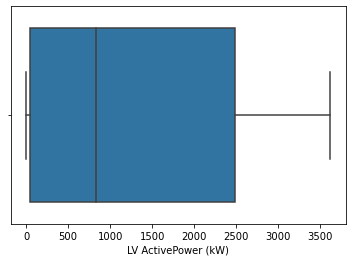

In [5]:
import seaborn as sns
sns.boxplot(x=ds['LV ActivePower (kW)'])

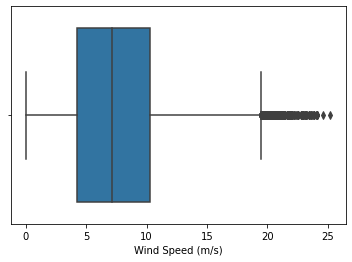

In [6]:
import seaborn as sns
sns.boxplot(x=ds['Wind Speed (m/s)'])

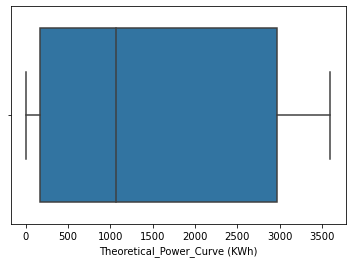

In [7]:
import seaborn as sns
sns.boxplot(x=ds['Theoretical_Power_Curve (KWh)'])

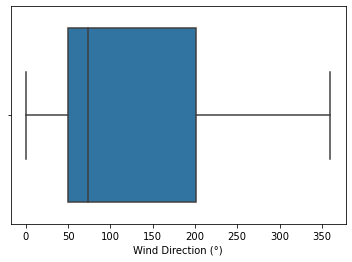

In [8]:
import seaborn as sns
sns.boxplot(x=ds['Wind Direction (°)'])

In [9]:
q1=ds.quantile(0.25)
q3=ds.quantile(0.75)
IQR=q3-q1
IQR

LV ActivePower (kW)              2431.829679
Wind Speed (m/s)                    6.098625
Theoretical_Power_Curve (KWh)    2803.644294
Wind Direction (°)                152.381283
dtype: float64

In [10]:
df=ds[~((ds<(q1-1.5*IQR))|(ds>(q3 + 1.5*IQR))).any(axis=1)]
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [11]:
df.corr()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
LV ActivePower (kW),1.000000,0.917028,0.948918,-0.075258
Wind Speed (m/s),0.917028,1.000000,0.952875,-0.102238
Theoretical_Power_Curve (KWh),0.948918,0.952875,1.000000,-0.110671
Wind Direction (°),-0.075258,-0.102238,-0.110671,1.000000


In [23]:
del df['Date/Time']

In [31]:
x=df.iloc[:,1:].values
x

array([[   5.31133604,  416.32890782,  259.99490356],
       [   5.67216682,  519.91751106,  268.64111328],
       [   5.2160368 ,  390.90001581,  272.56478882],
       ...,
       [   8.43535805, 1788.28475526,   84.74250031],
       [   9.42136574, 2418.38250336,   84.2979126 ],
       [   9.97933197, 2779.18409628,   82.27462006]])

In [32]:
y=df.iloc[:,0].values
y

array([ 380.04779053,  453.76919556,  306.37658691, ..., 2201.10693359,
       2515.6940918 , 2820.46606445])

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [35]:
y_test

array([3602.15405273,  123.20300293, 2469.97705078, ...,    0.        ,
         35.36426926, 3442.13500977])

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
mr=LinearRegression()

In [38]:
mr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
y_pred=mr.predict(x_test)
y_pred

array([3255.05573563,  260.20427059, 2711.81571103, ...,  -86.37299583,
        -28.50145466, 3159.6760914 ])

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9014852529325026

In [45]:
mr.predict([[5.311336,416.328908,259.994904]])

array([420.42749354])